<a href="https://colab.research.google.com/github/mdaffaadr/MyPortfolio/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Methane_final.csv')


In [ ]:
df.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     1548 non-null   object 
 1   country    1548 non-null   object 
 2   emissions  1548 non-null   float64
 3   type       1548 non-null   object 
 4   segment    1548 non-null   object 
 5   reason     1548 non-null   object 
 6   baseYear   1548 non-null   object 
 7   notes      1548 non-null   object 
dtypes: float64(1), object(7)
memory usage: 96.9+ KB


In [ ]:
df.isnull().sum()

region       0
country      0
emissions    0
type         0
segment      0
reason       0
baseYear     0
notes        0
dtype: int64

In [ ]:
df['type'].value_counts()

Energy         1233
Agriculture     105
Other           105
Waste           105
Name: type, dtype: int64

In [ ]:
df['segment'].value_counts()

Total                                             414
Onshore oil                                       217
Gas pipelines and LNG facilities                  164
Offshore oil                                      159
Onshore gas                                       144
Offshore gas                                      118
Other from oil and gas                             98
Bioenergy                                          93
Other from coal                                    66
Steam coal                                         30
Coking coal                                        24
Satellite-detected large oil and gas emissions     21
Name: segment, dtype: int64

In [ ]:
temp=df[df['type']=='Energy']
temp.head()

,region,country,emissions,type,segment,reason,baseYear,notes
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
5,Africa,Algeria,464.308014,Energy,Onshore gas,Vented,2022,Not available


In [ ]:
temp=temp[(temp['region']!='World')&(temp['segment']!='Total')]


In [ ]:
px.sunburst(temp,values='emissions',path=['region','segment'],color='region',width=700,height=700)

In [ ]:
temp1=temp.groupby('segment').sum().reset_index()
temp1.sort_values('emissions',ascending=False,inplace=True)

<ipython-input-14-ed1f9fed7a7e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
px.bar(temp1,x='segment',y='emissions',color='segment',labels={'emissions':'Methane emission'})

In [ ]:
temp2=df[df['country']!='World']
temp2

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...
1521,Russia & Caspian,Uzbekistan,16.973917,Energy,Other from oil and gas,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1522,Russia & Caspian,Uzbekistan,18.299999,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1523,Russia & Caspian,Uzbekistan,780.916138,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1524,Russia & Caspian,Uzbekistan,3.845616,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [ ]:
temp2=df.loc[np.where((temp2['segment']=='Total'))]
temp2.groupby('type').sum().reset_index()

<ipython-input-17-3ec5d6c15457>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,type,emissions
0,Agriculture,150805.103144
1,Energy,135347.173195
2,Other,10028.772862
3,Waste,75079.707008


In [ ]:
px.pie(temp2,values='emissions',names='type',hole=0.5)

In [ ]:
temp3=df[df['country']!='World']
temp3

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...
1521,Russia & Caspian,Uzbekistan,16.973917,Energy,Other from oil and gas,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1522,Russia & Caspian,Uzbekistan,18.299999,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1523,Russia & Caspian,Uzbekistan,780.916138,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1524,Russia & Caspian,Uzbekistan,3.845616,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [ ]:

temp3=temp3.groupby(['segment','reason']).sum().reset_index()
temp3.drop(index=[18],inplace=True)


<ipython-input-20-b2854bcff25f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
px.bar(temp3,x='emissions',y='segment',color='reason')

**K-means** **Clustering**

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(df[['emissions']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Agglomerative clustering**

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(df[['emissions']])

**DBSCAN clustering**

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df[['emissions']])

**Davies Bouldin Index**

In [ ]:
kmeans_dbi = davies_bouldin_score(df[['emissions']], kmeans_labels)
agglomerative_dbi = davies_bouldin_score(df[['emissions']], agglomerative_labels)
dbscan_dbi = davies_bouldin_score(df[['emissions']], dbscan_labels)

In [ ]:
print("K-means DBI:", kmeans_dbi)
print("Agglomerative DBI:", agglomerative_dbi)
print("DBSCAN DBI:", dbscan_dbi)

K-means DBI: 0.32819647752718956
Agglomerative DBI: 0.33922495953226633
DBSCAN DBI: 1.371988268957757


**Clustering Visualization Results**

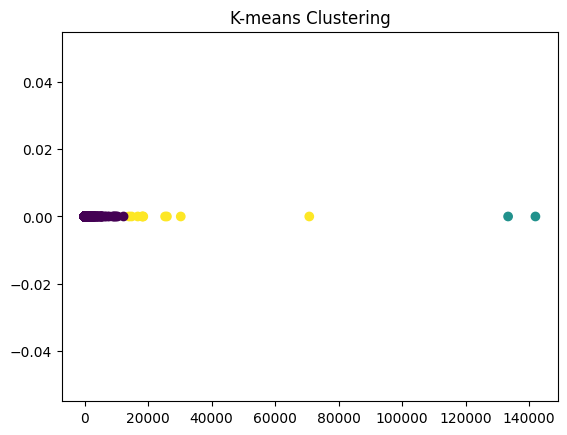

In [ ]:
plt.scatter(df['emissions'], np.zeros_like(df['emissions']), c=kmeans_labels)
plt.title('K-means Clustering')
plt.show()

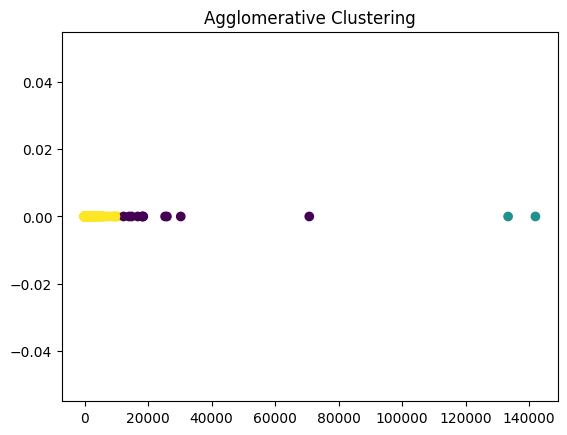

In [ ]:
plt.scatter(df['emissions'], np.zeros_like(df['emissions']), c=agglomerative_labels)
plt.title('Agglomerative Clustering')
plt.show()

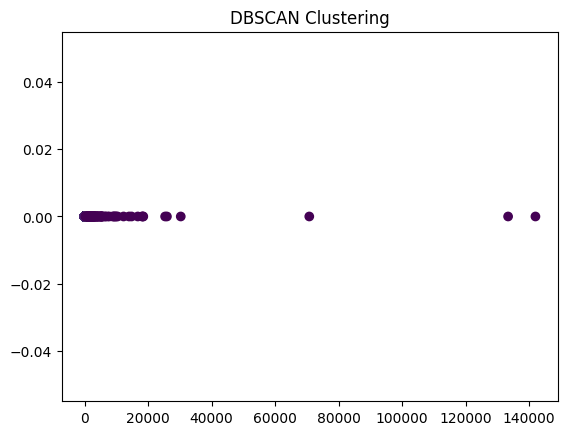

In [ ]:
plt.scatter(df['emissions'], np.zeros_like(df['emissions']), c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()